## Dataset Analysis

### Import libraries

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
import chart_studio.plotly as py
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

In [2]:
#import misceallenous libraries
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse

### Import the data

In [3]:
df = pd.read_csv('HR-Employee.csv')

In [4]:
df.shape

(1470, 35)

In [5]:
df_HR = df.copy()

### Data Description and Exploratory Visualizations

In [6]:
df_HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df_HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [8]:
df_HR.columns.to_series().groupby(df_HR.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [9]:
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Numerical Feature Overview

In [10]:
df_HR.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


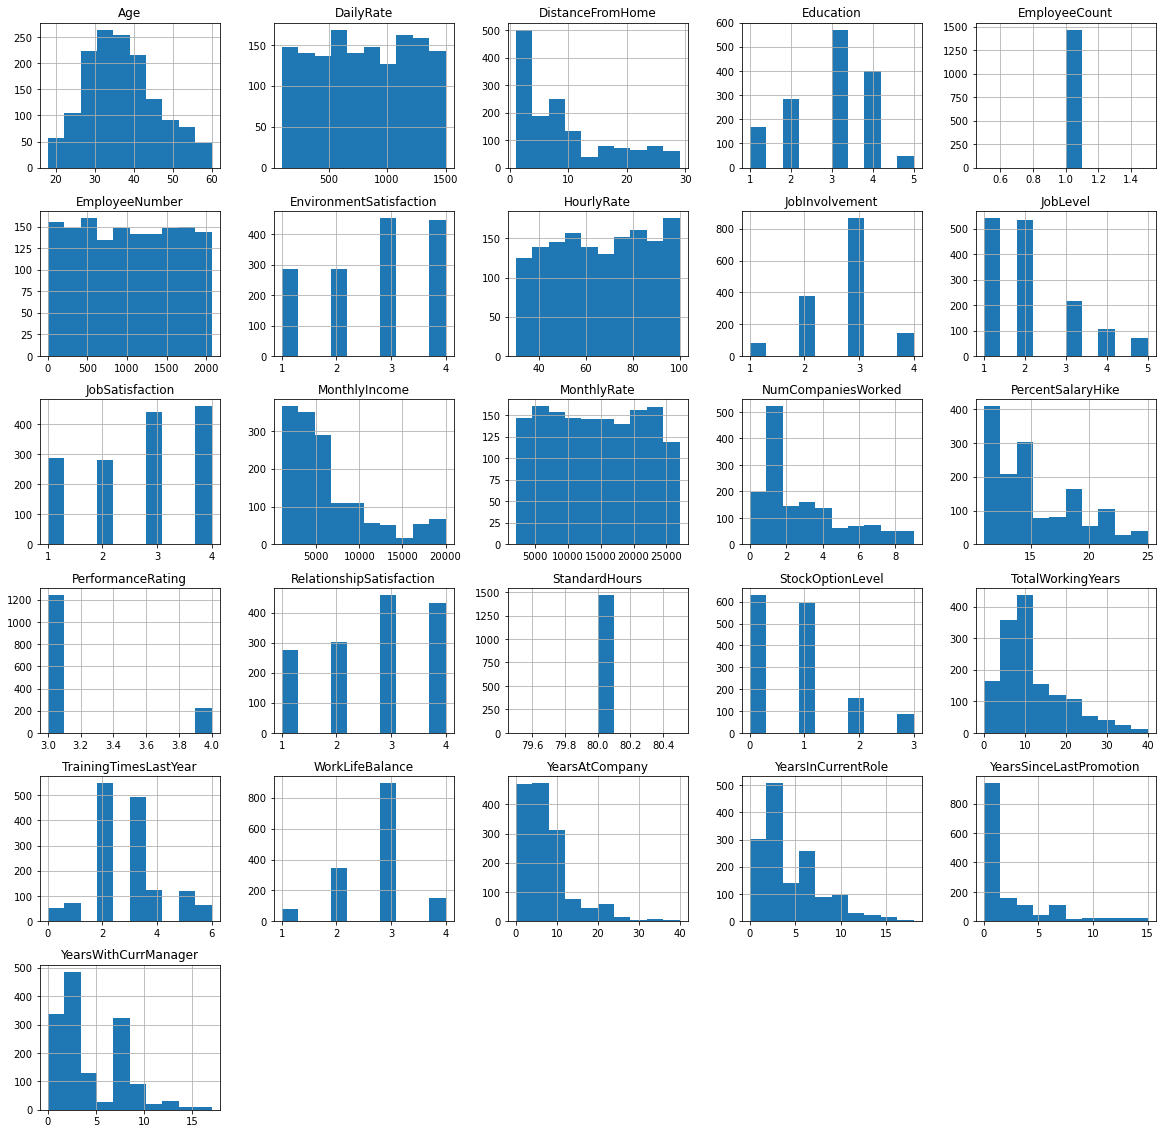

In [11]:
df_HR.hist(figsize=(20,20))
plt.show()

A few observation can be made based on the information and histograms of numerical features:


### Feature Distribution by Target Attribute

#### Age

- The average age of ex-employees is 33.6 years old, whereas 37.6 years old is the average age of current employees.
- The age distribution for active and ex-employees only differs by one year.

In [12]:
(mu,sigma) = norm.fit(df_HR.loc[df_HR['Attrition']== 'Yes','Age'])
print('Ex-employees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu,sigma))
(mu,sigma) = norm.fit(df_HR.loc[df_HR['Attrition']== 'No','Age'])
print('Current employees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu,sigma))

Ex-employees: average age = 33.6 years old and standard deviation = 9.7
Current employees: average age = 37.6 years old and standard deviation = 8.9


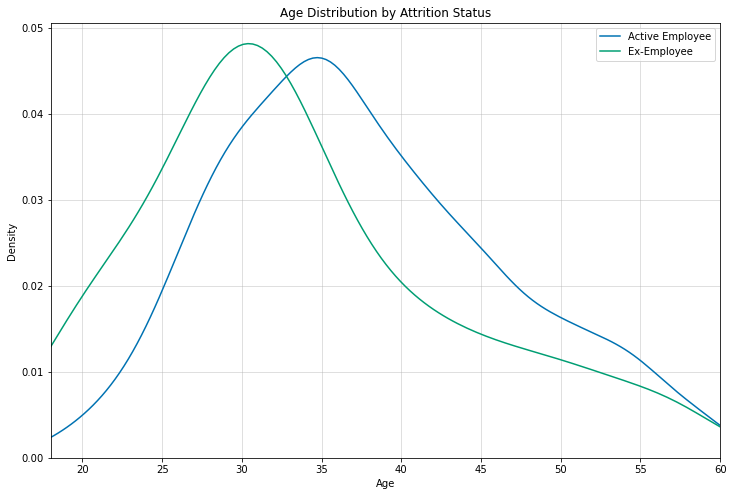

In [48]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn-colorblind')
plt.grid(True,alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition']=='No','Age'],label='Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition']=='Yes','Age'],label='Ex-Employee')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Attrition Status')
plt.xlim(left = 18, right = 60)
plt.legend()

#### Education

There are several education field in employees,including Life Sciences, Medical, Marketing, Technical Degree, Human Resources and Other. Among the leavers, Human Resources and Technical Degree feature higher relative proportion, 25.9% and 24.2% respecitively.

In [14]:
df_HR['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [15]:
df_EducationField = pd.DataFrame(columns = ['Field','% of Leavers'])
i = 0
for field in list(df_HR['EducationField'].unique()):
    ratio = df_HR[(df_HR['EducationField'] == field)&(df_HR['Attrition']== 'Yes')].shape[0] / df_HR[df_HR['EducationField']==field].shape[0]
    df_EducationField.loc[i] = (field,ratio*100)
    i += 1
df_EF = df_EducationField.groupby(by='Field').sum()
df_EF.iplot(kind='bar',title='Leavers by Education Field(%)')

#### Gender

Gender distribution shows that the dataset features a higher relative proportion of male ex-employees than female ex-employees, with normalised gender distribution of ex-employees in the dataset at 17.0% for Males and 14.8% for Females.

In [16]:
df_HR['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [17]:
print("Normalised gender distribution of ex-employees in the dataset: Male = {:.1f}%; Female {:.1f}%.".format((df_HR[(df_HR['Attrition'] == 'Yes') & (
    df_HR['Gender'] == 'Male')].shape[0] / df_HR[df_HR['Gender'] == 'Male'].shape[0])*100, 
   (df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['Gender'] == 'Female')].shape[0] / df_HR[df_HR['Gender'] == 'Female'].shape[0])*100))

Normalised gender distribution of ex-employees in the dataset: Male = 17.0%; Female 14.8%.


In [18]:
df_Gender = pd.DataFrame(columns = ['Gender','% of Leavers'])
i = 0
for field in list(df_HR['Gender'].unique()):
    ratio = df_HR[(df_HR['Gender']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['Gender']==field].shape[0]
    df_Gender.loc[i] = (field, ratio*100)
    i += 1
df_G = df_Gender.groupby(by='Gender').sum()
df_G.iplot(kind='bar',title='Leavers by Gender(%)')

#### Marital Status 

There are three different kinds of martial status: Married(673 employees), Single(470 employees) and divorced(327 employees).
Single employees show the largest proportion of leavers at 25%.

In [19]:
df_HR['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [20]:
df_Marital = pd.DataFrame(columns = ['Marital Status', '% of Leavers'])
i = 0
for field in list(df_HR['MaritalStatus'].unique()):
    ratio = df_HR[(df_HR['MaritalStatus']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['MaritalStatus']==field].shape[0]
    df_Marital.loc[i] = (field,ratio*100)
    i += 1
df_MF = df_Marital.groupby(by='Marital Status').sum()
df_MF.iplot(kind='bar',title='Leavers by Marital Status(%)')

#### Distance from Home

Distance from home for employees to get to work varies from 1 to 29 miles. There is no discernable strong correlation between Distance from Home and Attrition Status as per the KDE plot below.

In [21]:
print('Distance from home for employees to get to work is from {} to {} miles'.format(df_HR['DistanceFromHome'].min(),df_HR['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles


In [22]:
print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
df_HR[df_HR['Attrition']=='No']['DistanceFromHome'].mean(),df_HR[df_HR['Attrition']=='Yes']['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 8.92 miles and ex-employees: 10.63 miles


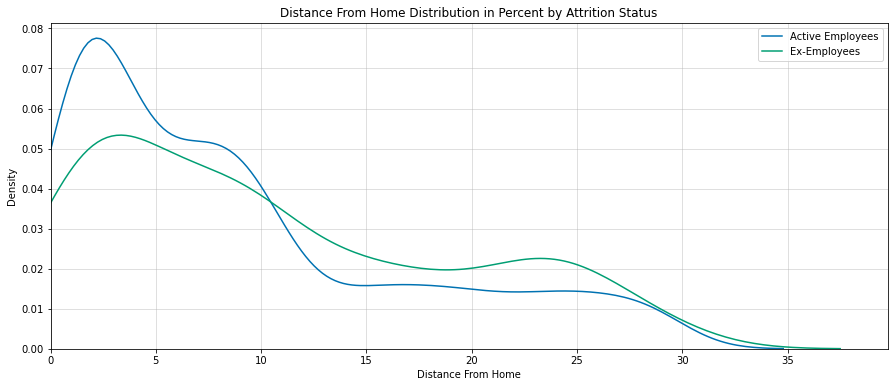

In [47]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True,alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition']=='No','DistanceFromHome'],label='Active Employees')
sns.kdeplot(df_HR.loc[df_HR['Attrition']=='Yes','DistanceFromHome'],label='Ex-Employees')
plt.xlabel('Distance From Home')
plt.ylabel('Density')
plt.title('Distance From Home Distribution in Percent by Attrition Status')
plt.xlim(left=0)
plt.legend()

#### Department

The data features employee data from three departments: Research & Development, Sales, Human Resources, and Research & Development has the lowest proportion of leaving employees.

In [28]:
df_HR['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [31]:
df_Department = pd.DataFrame(columns = ['Department','% of Leavers'])
i = 0
for field in list(df_HR['Department'].unique()):
    ratio = df_HR[(df_HR['Department']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['Department']==field].shape[0]
    df_Department.loc[i] = (field, ratio*100)
    i += 1
df_DF = df_Department.groupby(by='Department').sum()
df_DF.iplot(kind = 'bar',title='Leavers by Department (%)')

#### Role and Work Conditions

A preliminary look at the relationship between Business Travel frequency and Attrition Status shows that there is a largest normalized proportion of Leavers for employees that travel "frequently". Travel metrics associated with Business Travel status were not disclosed.

In [32]:
df_HR['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [33]:
df_BusinessTravel = pd.DataFrame(columns = ['Business Travel','% of Leavers'])
i = 0
for field in list(df_HR['BusinessTravel'].unique()):
    ratio = df_HR[(df_HR['BusinessTravel']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['BusinessTravel']==field].shape[0]
    df_BusinessTravel.loc[i] = (field, ratio*100)
    i += 1
df_BT = df_BusinessTravel.groupby(by='Business Travel').sum()
df_BT.iplot(kind = 'bar',title='Leavers by Business Travel (%)')

There are several job roles listing in the dataset: Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources. Employees in Sales Representative show the largest normalized proportion of Leavers, around 40%.

In [34]:
df_HR['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [35]:
df_JobRole = pd.DataFrame(columns = ['Job Role','% of Leavers'])
i = 0
for field in list(df_HR['JobRole'].unique()):
    ratio = df_HR[(df_HR['JobRole']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1
df_JR = df_JobRole.groupby(by='Job Role').sum()
df_JR.iplot(kind = 'bar',title='Leavers by Job Role (%)')

Employees have an assigned level within the organisation which varies from 1 (staff) to 5 (managerial/director). Employees with an assigned Job Level of "1" show the largest normalized proportion of Leavers.

In [36]:
df_HR['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [37]:
df_JobLevel = pd.DataFrame(columns=["Job Level", "% of Leavers"])
i=0
for field in list(df_HR['JobLevel'].unique()):
    ratio = df_HR[(df_HR['JobLevel']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['JobLevel']==field].shape[0]
    df_JobLevel.loc[i] = (field, ratio*100)
    i += 1
df_JL = df_JobLevel.groupby(by="Job Level").sum()
df_JL.iplot(kind='bar',title='Leavers by Job Level (%)')

A ranking is associated to the employee's Job Involvement :1 'Low' 2 'Medium' 3 'High' 4 'Very High'. The plot below indicates a negative correlation with the Job Involvement of an employee and the Attrition Status. In other words, employees with higher Job Involvement are less likely to leave.

In [38]:
df_HR['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [40]:
df_JobInvolvement = pd.DataFrame(columns=["Job Involvement", "% of Leavers"])
i=0
for field in list(df_HR['JobInvolvement'].unique()):
    ratio = df_HR[(df_HR['JobInvolvement']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['JobInvolvement']==field].shape[0]
    df_JobInvolvement.loc[i] = (field, ratio*100)
    i += 1
df_JI = df_JobInvolvement.groupby(by="Job Involvement").sum()
df_JI.iplot(kind='bar',title='Leavers by Job Involvement (%)')

TrainingTimesLastYear indicates that how many years it has been since the employee attended such training.

In [43]:
print('Number of traing times last year varies from {} to {} years.'.format(df_HR['TrainingTimesLastYear'].min(),df_HR['TrainingTimesLastYear'].max()))

Number of traing times last year varies from 0 to 6 years.


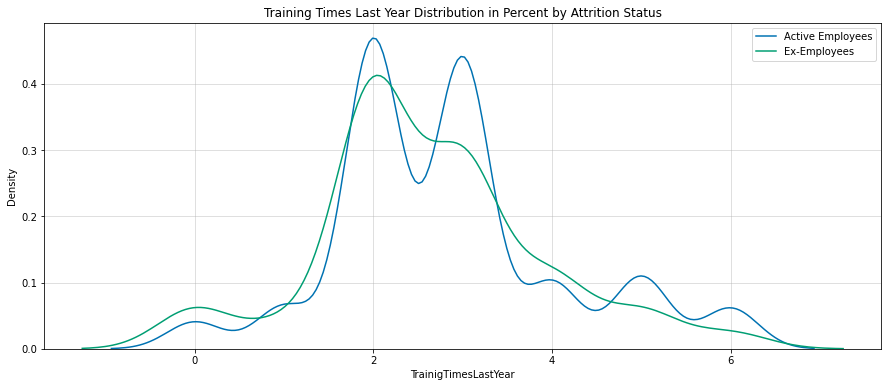

In [46]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True,alpha = 0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition']=='No','TrainingTimesLastYear'], label='Active Employees')
sns.kdeplot(df_HR.loc[df_HR['Attrition']=='Yes','TrainingTimesLastYear'], label='Ex-Employees')
plt.xlabel('TrainigTimesLastYear')
plt.ylabel('Density')
plt.title('Training Times Last Year Distribution in Percent by Attrition Status')
plt.legend()
plt.show()

There is a feature for the number of companies the employee has worked at. 0 likely indicates that according to records, the employee has only worked at this company. According to the below plot, leavers who work in more than 5 companies have a large proportion than others.

In [49]:
df_HR['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [50]:
df_NumCompaniesWorked = pd.DataFrame(columns=["Num Companies Worked", "% of Leavers"])
i=0
for field in list(df_HR['NumCompaniesWorked'].unique()):
    ratio = df_HR[(df_HR['NumCompaniesWorked']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['NumCompaniesWorked']==field].shape[0]
    df_NumCompaniesWorked.loc[i] = (field, ratio*100)
    i += 1 
df_NC = df_NumCompaniesWorked.groupby(by="Num Companies Worked").sum()
df_NC.iplot(kind='bar',title='Leavers by Num Companies Worked (%)')

#### Years at the company

In [51]:
print('Number of Years at the company varies from {} to {} years'.format(
df_HR['YearsAtCompany'].min(), df_HR['YearsAtCompany'].max()))

Number of Years at the company varies from 0 to 40 years


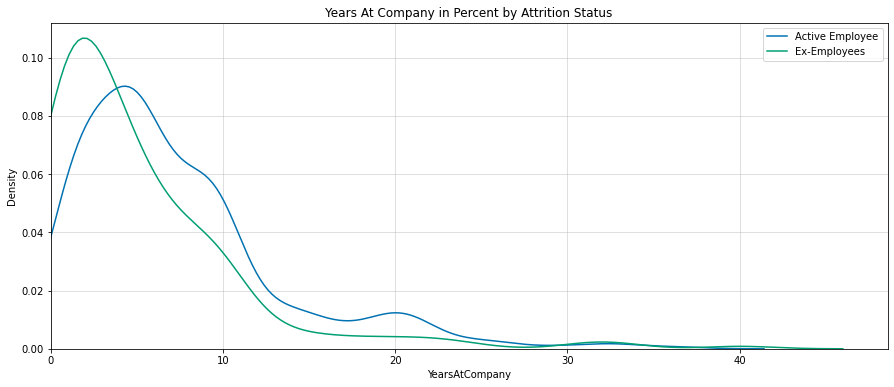

In [52]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employees')
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years At Company in Percent by Attrition Status')
plt.legend()

In [53]:
print('Number of Years in the current role varies from {} to {} years'.format(
df_HR['YearsInCurrentRole'].min(), df_HR['YearsInCurrentRole'].max()))

Number of Years in the current role varies from 0 to 18 years


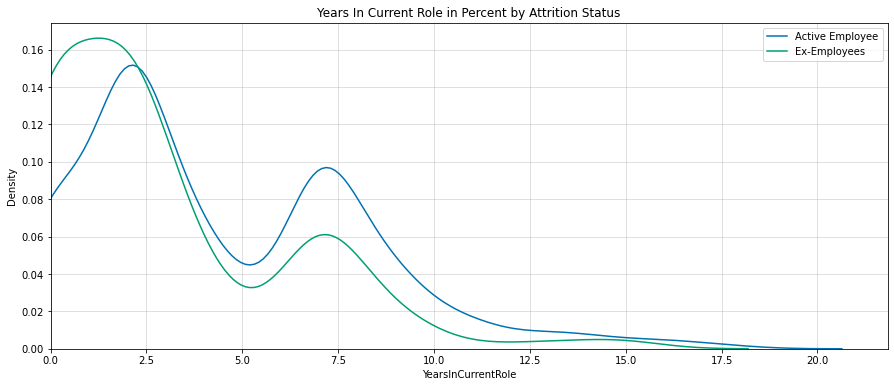

In [54]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'YearsInCurrentRole'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsInCurrentRole'], label = 'Ex-Employees')
plt.xlabel('YearsInCurrentRole')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years In Current Role in Percent by Attrition Status')
plt.legend()

In [55]:
print("Number of Years since last promotion varies from {} to {} years.".format(
    df_HR['YearsSinceLastPromotion'].min(), df_HR['YearsSinceLastPromotion'].max()))

Number of Years since last promotion varies from 0 to 15 years.


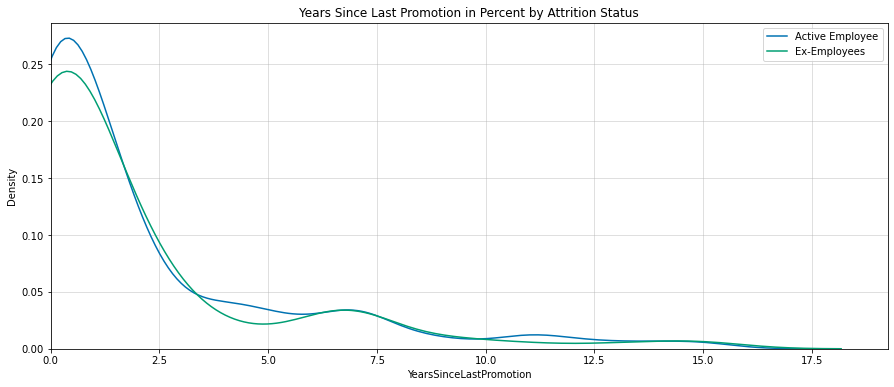

In [56]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'YearsSinceLastPromotion'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsSinceLastPromotion'], label = 'Ex-Employees')
plt.xlabel('YearsSinceLastPromotion')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years Since Last Promotion in Percent by Attrition Status')
plt.legend()

In [57]:
print("Total working years varies from {} to {} years.".format(
    df_HR['TotalWorkingYears'].min(), df_HR['TotalWorkingYears'].max()))

Total working years varies from 0 to 40 years.


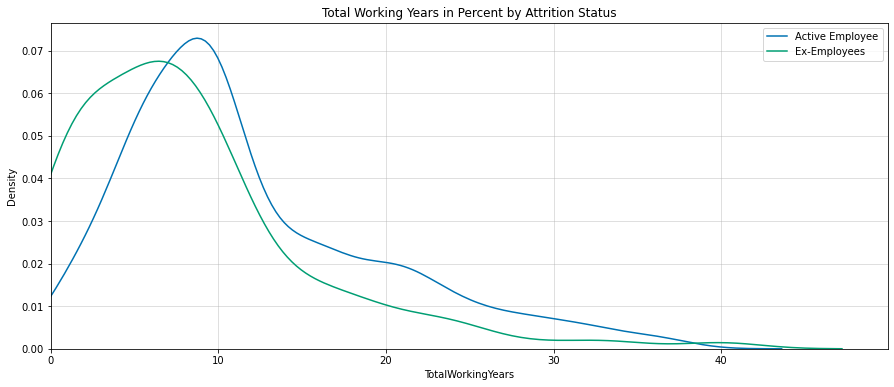

In [58]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'TotalWorkingYears'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'TotalWorkingYears'], label = 'Ex-Employees')
plt.xlabel('TotalWorkingYears')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Total Working Years in Percent by Attrition Status')
plt.legend()

#### Years With Current Manager

In [59]:
print("Number of Years wit current manager varies from {} to {} years.".format(
    df_HR['YearsWithCurrManager'].min(), df_HR['YearsWithCurrManager'].max()))

Number of Years wit current manager varies from 0 to 17 years.


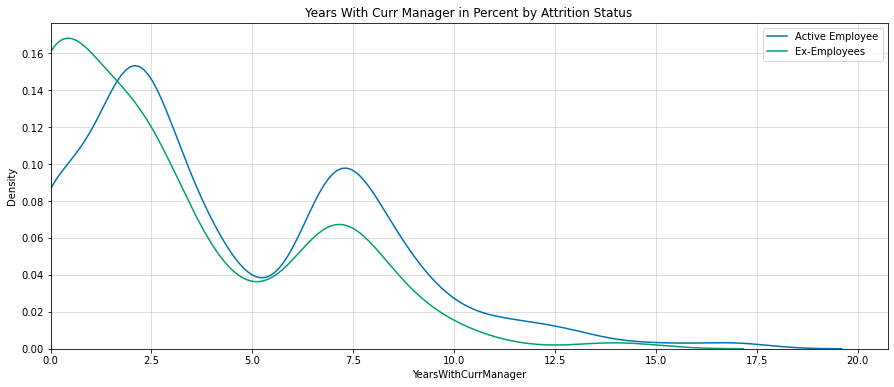

In [60]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'YearsWithCurrManager'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsWithCurrManager'], label = 'Ex-Employees')
plt.xlabel('YearsWithCurrManager')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years With Curr Manager in Percent by Attrition Status')
plt.legend()

#### Work-Life Balance Score

A feature related to "Work-Life Balance" was captured as: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'. The data indicates that the largest normalised proportion of Leavers had "Bad" Work-Life Balance.

In [61]:
df_HR['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [62]:
df_WorkLifeBalance = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i=0
for field in list(df_HR['WorkLifeBalance'].unique()):
    ratio = df_HR[(df_HR['WorkLifeBalance']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['WorkLifeBalance']==field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio*100)
    i += 1
df_WLB = df_WorkLifeBalance.groupby(by="WorkLifeBalance").sum()
df_WLB.iplot(kind='bar',title='Leavers by WorkLifeBalance (%)')

All employees have a standard 80-hour work commitment

In [63]:
df_HR['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

Some employees have overtime commitments. The data clearly show that there is significant larger portion of employees with overtime that have left the company.

In [64]:
df_HR['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [65]:
df_OverTime = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i=0
for field in list(df_HR['OverTime'].unique()):
    ratio = df_HR[(df_HR['OverTime']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['OverTime']==field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
df_OT = df_OverTime.groupby(by="OverTime").sum()
df_OT.iplot(kind='bar',title='Leavers by OverTime (%)')

#### Pay/Salary Employee Information

In [66]:
print('Employee Hourly Rate varies from ${} to ${}.'.format(
    df_HR['HourlyRate'].min(), df_HR['HourlyRate'].max()))

Employee Hourly Rate varies from $30 to $100.


In [67]:
print('Employee Daily Rate varies from ${} to ${}.'.format(
    df_HR['DailyRate'].min(), df_HR['DailyRate'].max()))

Employee Daily Rate varies from $102 to $1499.


In [68]:
print('Employee Monthly Rate varies from ${} to ${}.'.format(
    df_HR['MonthlyRate'].min(), df_HR['MonthlyRate'].max()))

Employee Monthly Rate varies from $2094 to $26999.


In [69]:
print('Employee Monthly Income varies from ${} to ${}.'.format(
    df_HR['MonthlyIncome'].min(), df_HR['MonthlyIncome'].max()))

Employee Monthly Income varies from $1009 to $19999.


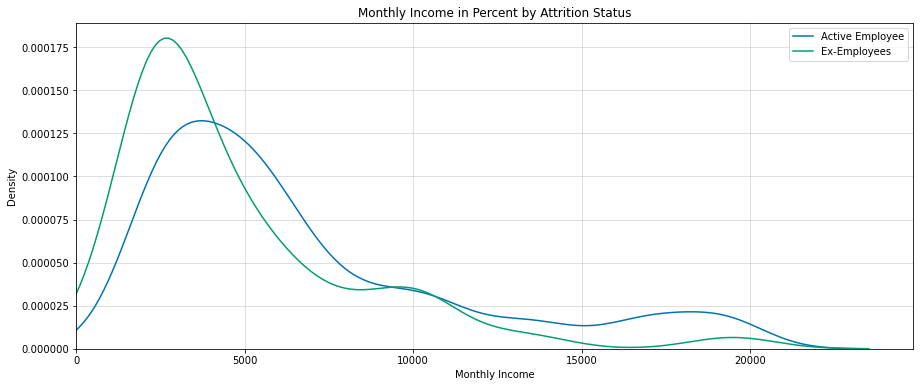

In [70]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'MonthlyIncome'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'MonthlyIncome'], label = 'Ex-Employees')
plt.xlabel('Monthly Income')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Monthly Income in Percent by Attrition Status')
plt.legend()

In [72]:
print('Percentage Salary Hikes varies from {}% to {}%'.format(
    df_HR['PercentSalaryHike'].min(), df_HR['PercentSalaryHike'].max()))

Percentage Salary Hikes varies from 11% to 25%


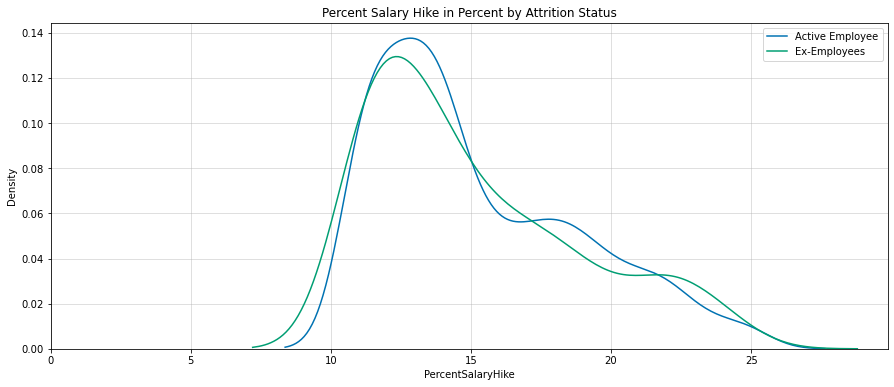

In [73]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'PercentSalaryHike'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'PercentSalaryHike'], label = 'Ex-Employees')
plt.xlabel('PercentSalaryHike')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Percent Salary Hike in Percent by Attrition Status')
plt.legend()

In [74]:
print('Stock Option Levels varies from {} to {}.'.format(
    df_HR['StockOptionLevel'].min(), df_HR['StockOptionLevel'].max()))

Stock Option Levels varies from 0 to 3.


In [75]:
print("Normalised percentage of leavers by Stock Option Level: 1: {:.2f}%, 2: {:.2f}%, 3: {:.2f}%".format(
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['StockOptionLevel'] == 1)
          ].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100,
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['StockOptionLevel'] == 2)
          ].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100,
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['StockOptionLevel'] == 3)].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 1: 9.40%, 2: 2.01%, 3: 2.52%


In [76]:
df_StockOptionLevel = pd.DataFrame(columns=["StockOptionLevel", "% of Leavers"])
i=0
for field in list(df_HR['StockOptionLevel'].unique()):
    ratio = df_HR[(df_HR['StockOptionLevel']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['StockOptionLevel']==field].shape[0]
    df_StockOptionLevel.loc[i] = (field, ratio*100)
    i += 1
df_SOL = df_StockOptionLevel.groupby(by="StockOptionLevel").sum()
df_SOL.iplot(kind='bar',title='Leavers by Stock Option Level (%)')

#### Employee Satisfaction and Performance information

Environment Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.
Proportion of Leaving Employees decreases as the Environment Satisfaction score increases.

In [78]:
df_HR['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [79]:
df_EnvironmentSatisfaction = pd.DataFrame(columns=["EnvironmentSatisfaction", "% of Leavers"])
i=0
for field in list(df_HR['EnvironmentSatisfaction'].unique()):
    ratio = df_HR[(df_HR['EnvironmentSatisfaction']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['EnvironmentSatisfaction']==field].shape[0]
    df_EnvironmentSatisfaction.loc[i] = (field, ratio*100)
    i += 1
df_Env = df_EnvironmentSatisfaction.groupby(by="EnvironmentSatisfaction").sum()
df_Env.iplot(kind='bar',title='Leavers by Environment Satisfaction (%)')

Job Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.
Proportion of Leaving Employees decreases as the Job Satisfaction score increases.

In [80]:
df_HR['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [81]:
df_JobSatisfaction = pd.DataFrame(columns=["JobSatisfaction", "% of Leavers"])
i=0
for field in list(df_HR['JobSatisfaction'].unique()):
    ratio = df_HR[(df_HR['JobSatisfaction']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['JobSatisfaction']==field].shape[0]
    df_JobSatisfaction.loc[i] = (field, ratio*100)
    i += 1
df_JS = df_JobSatisfaction.groupby(by="JobSatisfaction").sum()
df_JS.iplot(kind='bar',title='Leavers by Job Satisfaction (%)')

Relationship Satisfaction was captured as: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'.

In [82]:
df_HR['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [83]:
df_RelationshipSatisfaction = pd.DataFrame(columns=["RelationshipSatisfaction", "% of Leavers"])
i=0
for field in list(df_HR['RelationshipSatisfaction'].unique()):
    ratio = df_HR[(df_HR['RelationshipSatisfaction']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['RelationshipSatisfaction']==field].shape[0]
    df_RelationshipSatisfaction.loc[i] = (field, ratio*100)
    i += 1  
df_RS = df_RelationshipSatisfaction.groupby(by="RelationshipSatisfaction").sum()
df_RS.iplot(kind='bar',title='Leavers by Relationship Satisfaction (%)')

Employee Performance Rating was captured as: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

In [84]:
df_HR['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [85]:
print("Normalised percentage of leavers by Performance Rating: 3: {:.2f}%, 4: {:.2f}%".format(
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['PerformanceRating'] == 3)
          ].shape[0] / df_HR[df_HR['PerformanceRating'] == 3].shape[0]*100,
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['PerformanceRating'] == 4)].shape[0] / df_HR[df_HR['PerformanceRating'] == 4].shape[0]*100))

Normalised percentage of leavers by Performance Rating: 3: 16.08%, 4: 16.37%


In [86]:
df_PerformanceRating = pd.DataFrame(columns=["PerformanceRating", "% of Leavers"])
i=0
for field in list(df_HR['PerformanceRating'].unique()):
    ratio = df_HR[(df_HR['PerformanceRating']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['PerformanceRating']==field].shape[0]
    df_PerformanceRating.loc[i] = (field, ratio*100)
    i += 1
df_PR = df_PerformanceRating.groupby(by="PerformanceRating").sum()
df_PR.iplot(kind='bar',title='Leavers by Performance Rating (%)')

### Target Variable: Attrition

In [87]:
df_HR['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [88]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df_HR[df_HR['Attrition'] == 'No'].shape[0] / df_HR.shape[0]*100,
    df_HR[df_HR['Attrition'] == 'Yes'].shape[0] / df_HR.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


In [89]:
df_HR['Attrition'].iplot(kind='hist', xTitle='Attrition',
                         yTitle='count', title='Attrition Distribution')

As shown on the chart above, we see this is an imbalanced class problem. Indeed, the percentage of Current Employees in our dataset is 83.9% and the percentage of Ex-employees is: 16.1%

Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

#### Correlation

In [90]:
df_HR_trans = df_HR.copy()
df_HR_trans['Target'] = df_HR_trans['Attrition'].apply(lambda x:0 if x=='No' else 1)
df_HR_trans = df_HR_trans.drop(
['Attrition','EmployeeCount','EmployeeNumber','StandardHours','Over18'],axis=1)
correlations = df_HR_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


<AxesSubplot:>

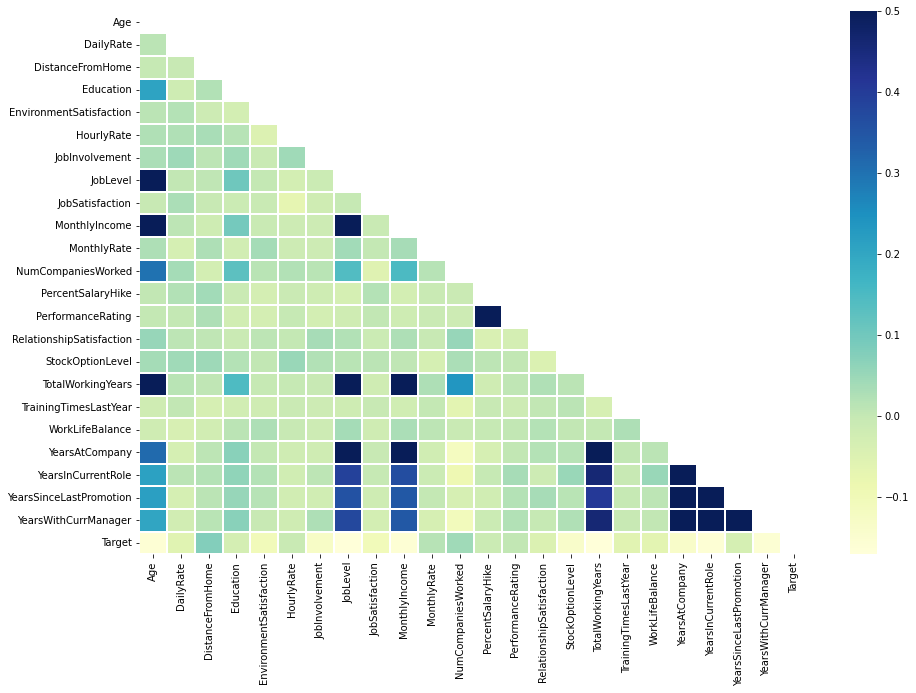

In [91]:
# Calculate correlations
corr = df_HR_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

As shown above, "Monthly Rate", "Number of Companies Worked" and "Distance From Home" are positively correlated to Attrition;
while "Total Working Years", "Job Level", and "Years In Current Role" are negatively correlated to Attrition.

### EDA Conclusion

The findings from above EDA:

* The dataset does not feature any missing or erroneous data values, and all features are of the correct data type.
* The strongest positive correlations with the target features are: **Performance Rating, Monthly Rate, Num Companies Worked, Distance From Home.**
* The strongest negative correlations with the target features are: **Total Working Years, Job Level, Years In Current Role, and Monthly Income.**
* The dataset is **imbalanced** with the majoriy of observations describing Currently Active Employees.
* Several features (ie columns) are redundant for our analysis, namely: EmployeeCount, EmployeeNumber, StandardHours, and Over18.

Other observations include:

* Single employees show the largest proportion of leavers, compared to Married and Divorced counterparts.
* About 10% of leavers left when they reach their 2-year anniversary at the company.
* Loyal employees with higher salaries and more responsbilities show lower proportion of leavers compared to their counterparts.
* People who live further away from their work show higher proportion of leavers compared to their counterparts.
* People who travel frequently show higher proportion of leavers compared to their counterparts.
* People who have to work overtime show higher proportion of leavers compared to their counterparts.
* Employee who work as Sales Representatives show a significant percentage of Leavers in the submitted dataset.
* Employees that have already worked at several companies previously (already "bounced" between workplaces) show higher proportion of leavers compared to their counterparts.